## Potential locations to set up food distribution warehouse in Singapore
### IBM Capstone Project (Assignment Weeks 4 and 5)
<br>


#### INTRODUCTION
<i>Introduction where you discuss the business problem and who would be interested in this project.</i>
<br>

Singapore, a country located in Southeast Asia, is well-connected with Mass Rapid Transport (MRT) train stations found throughout the island. The train stations bring convenience to commuters as many different amenities are typically found near the train stations. Eateries such as food courts, coffee shops, restaurants are commonly found near train stations, whereby the footfall is typically the highest.

To a food distribution company, by examining the distribution of eateries near train stations will help us determine a suitable location to set up a food distribution warehouse (storage facility) or central kitchen near many eateries in order to save transport cost in terms of fuel cost and transport time. It will also help to ensure fresh food is delivered on time.
<br><br>

#### METHODOLOGY
##### DATA SOURCE
<i>Data where you describe the data that will be used to solve the problem and the source of the data.</i>
1. Data of train stations was retrieved from GitHub repository, whereby the user who had kindly provided the geospatial data of MRT train stations. 
    https://raw.githubusercontent.com/xkjyeah/singapore-postal-codes/master/mrt_stations.json


2. Data of amenities near the train stations was retrieved from FourSquare. 100 amenities within the 500 m radius were obtained for each train station.


3. Singapore map was retrieved from leaflet.

All of these will allow us to plot the location and information of amenities for each train station.
<br><br>

##### METHODS
<i>Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.</i>

<b><i>Data Quality and Exploratory Data Exploration</i></b>
1. The data on MRT station was of good quality as they accurately reflect the geographical location of the MRT stations. It was also updated as the newest train stations are included. There are a total of 141 train stations.

2. The data of amenities near the train stations retrieved from FourSquare was accurate.

3. Singapore map was obtained from OpenMap and leaflet was accurate.
<br>

<b><i>Methods</i></b>
1. Obtain geographical data of train station and convert JSON data into dataframe for processing.
2. Obtain from FourSquare different amenities found in the vicinity of train stations.
3. Perform K-means clustering algorithm to find out different types and frequency of amenities found in the vicinity of  train stations.
4. Plot the location and information of amenities for each train station.
5. Visually locate a suitable location for the food distribution warehouse to be set up.


## Import packages

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## Create map

In [4]:
!wget -q -O 'sg_data.json' https://raw.githubusercontent.com/xkjyeah/singapore-postal-codes/master/mrt_stations.json
print('Data downloaded!')

Data downloaded!


In [3]:
'''import json
from pprint import pprint

with open('sg_data.json') as data_file:    
    data = json.load(data_file)
pprint(data)
'''

"import json\nfrom pprint import pprint\n\nwith open('sg_data.json') as data_file:    \n    data = json.load(data_file)\npprint(data)\n"

In [5]:
with open('sg_data.json') as json_data:
    sg_data = json.load(json_data)

neighbourhoods_data = sg_data

# define the dataframe columns
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbourhoods = pd.DataFrame(columns=column_names)

for data in neighbourhoods_data:
    neighbourhood_name = data['Station Name']
    neighbourhood_lat = data['Possible Locations'][0]['LATITUDE']
    neighbourhood_lon = data['Possible Locations'][0]['LONGTITUDE']
    
    neighbourhoods = neighbourhoods.append({'Neighbourhood': neighbourhood_name,
                                          'Latitude': neighbourhood_lat,
                                          'Longitude': neighbourhood_lon}, ignore_index=True)

In [5]:
neighbourhoods.head()

,Neighbourhood,Latitude,Longitude
0,Jurong East,1.33315261987297,103.742286544006
1,Bukit Batok,1.34903410858812,103.749566764129
2,Bukit Gombak,1.35861159094194,103.751790910733
3,Choa Chu Kang,1.38536316540226,103.744370779756
4,Yew Tee,1.39753501762625,103.747405114336


In [6]:
len(neighbourhoods)

141

In [6]:
neighbourhoods['Latitude'] = neighbourhoods['Latitude'].astype(float)
neighbourhoods['Longitude'] = neighbourhoods['Longitude'].astype(float)

sg_data = neighbourhoods

In [7]:
from pandas import DataFrame

'''data = {'Neighbourhood': ['Jurong East', 'City Hall'],
           'Latitude': [1.3329, 1.2931],
           'Longitude': [103.7436, 103.8521]
        }

sg_data = DataFrame(neighbourhoods,columns= ['Neighbourhood', 'Latitude', 'Longitude'])

print (sg_data)
'''

#create map of Singapore using latitude and longitude values
latitude = 1.35
longitude = 103.82
map_sg = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
#for lat, lng, label in zip(sg_data['Latitude'], sg_data['Longitude'], sg_data['Neighbourhood']):
for lat, lng, label in zip(sg_data['Latitude'], sg_data['Longitude'], sg_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_sg)
        #parse_html=False).add_to(map_sg)  
    
map_sg

## Connect to Foursquare

In [9]:
# The code was removed by Watson Studio for sharing.

In [10]:
sg_data.loc[0, 'Neighbourhood']

neighbourhood_latitude = sg_data.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = sg_data.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = sg_data.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
#url # display URL


Latitude and longitude values of Jurong East are 1.33315261987297, 103.742286544006.


In [11]:
results = requests.get(url).json()
#results

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,UNIQLO,Clothing Store,1.333175,103.743160
1,The Rink,Skating Rink,1.333424,103.740345
2,Song Fa Bak Kut Teh 松發肉骨茶,Chinese Restaurant,1.333394,103.743420
3,Tonkatsu by Ma Maison とんかつ マメゾン (Tonkatsu by M...,Japanese Restaurant,1.333668,103.742818
4,Johan Paris,Bakery,1.334083,103.742384


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
sg_venues = getNearbyVenues(names=sg_data['Neighbourhood'],
                                   latitudes=sg_data['Latitude'],
                                   longitudes=sg_data['Longitude']
                                  )

#print(ca_venues.shape)
#ca_venues.head()

Jurong East
Bukit Batok
Bukit Gombak
Choa Chu Kang
Yew Tee
Kranji
Marsiling
Woodlands
Admiralty
Sembawang
Yishun
Khatib
Yio Chu Kang
Ang Mo Kio
Bishan
Braddell
Toa Payoh
Novena
Newton
Orchard
Somerset
Dhoby Ghaut
City Hall
Raffles Place
Marina Bay
Marina South Pier
Pasir Ris
Tampines
Simei
Tanah Merah
Bedok
Kembangan
Eunos
Paya Lebar
Aljunied
Kallang
Lavender
Bugis
City Hall
Raffles Place
Tanjong Pagar
Outram Park
Tiong Bahru
Redhill
Queenstown
Commonwealth
Buona Vista
Dover
Clementi
Jurong East
Chinese Garden
Lakeside
Boon Lay
Pioneer
Joo Koon
Gul Circle
Tuas Crescent
Tuas West Road
Tuas Link
Expo
Changi Airport
HarbourFront
Outram Park
Chinatown
Clarke Quay
Dhoby Ghaut
Little India
Farrer Park
Boon Keng
Potong Pasir
Woodleigh
Serangoon
Kovan
Hougang
Buangkok
Sengkang
Punggol
Dhoby Ghaut
Bras Basah
Esplanade
Promenade
Nicoll Highway
Stadium
Mountbatten
Dakota
Paya Lebar
MacPherson
Tai Seng
Bartley
Serangoon
Lorong Chuan
Bishan
Marymount
Caldecott
Botanic Gardens
Farrer Road
Holland Vi

## Venues in Neighbourhood

In [16]:
sg_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Admiralty,9,9,9,9,9,9
Aljunied,49,49,49,49,49,49
Ang Mo Kio,40,40,40,40,40,40
Bartley,12,12,12,12,12,12
Bayfront,108,108,108,108,108,108
Beauty World,74,74,74,74,74,74
Bedok,58,58,58,58,58,58
Bedok North,19,19,19,19,19,19
Bedok Reservoir,7,7,7,7,7,7


In [17]:
print('There are {} unique categories.'.format(len(sg_venues['Venue Category'].unique())))

There are 320 unique categories.


## Hot encoding

In [18]:
# one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
sg_onehot['Neighbourhood'] = sg_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

,Neighbourhood,Accessories Store,African Restaurant,Airport,Airport Food Court,Airport Lounge,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Canal,Candy Store,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,St

In [19]:
sg_grouped = sg_onehot.groupby('Neighbourhood').mean().reset_index()
sg_grouped.head(5)

,Neighbourhood,Accessories Store,African Restaurant,Airport,Airport Food Court,Airport Lounge,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Canal,Candy Store,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,St

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 5 #Select number of top venues to display

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns = columns)
neighbourhoods_venues_sorted['Neighbourhood'] = sg_grouped['Neighbourhood']

for ind in np.arange(sg_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(2)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Admiralty,Supermarket,Coffee Shop,Fast Food Restaurant,Food Truck,Sushi Restaurant
1,Aljunied,Chinese Restaurant,Coffee Shop,Café,Noodle House,Vegetarian / Vegan Restaurant


## K-Means Clustering

In [22]:
#Display number of unique venues for 1st Most Common Venue
len(neighbourhoods_venues_sorted["1st Most Common Venue"].unique())

35

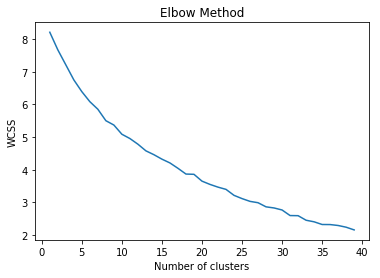

In [41]:
#Elbow method to determine number of clusters
import matplotlib.pyplot as plt

wcss = []

num_cluster = 40

for i in range(1, num_cluster):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sg_grouped.drop('Neighbourhood', 1))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, num_cluster), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
sg_merged["1st Most Common Venue"].value_counts()

Chinese Restaurant            25
Café                          19
Coffee Shop                   19
Japanese Restaurant           10
Food Court                    10
Bus Station                    8
Indian Restaurant              6
Bakery                         5
Hotel                          5
Fast Food Restaurant           4
Asian Restaurant               4
Noodle House                   3
Shopping Mall                  2
Pub                            2
Convenience Store              1
Boutique                       1
Diner                          1
Stadium                        1
Sports Club                    1
College Cafeteria              1
Snack Place                    1
Ski Area                       1
Tourist Information Center     1
Seafood Restaurant             1
Airport Lounge                 1
Hostel                         1
Theme Park                     1
Racetrack                      1
Cruise                         1
Thai Restaurant                1
Park      

In [22]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, init='k-means++', n_init=10, max_iter=200, random_state = 0).fit(sg_grouped.drop('Neighbourhood', 1))

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 0, 3, 2, 2, 2, 3, 3, 2], dtype=int32)

In [23]:
# add clustering labels
if 'Cluster Labels' in neighbourhoods_venues_sorted.columns:
    neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.drop('Cluster Labels', axis = 1)

neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sg_merged = sg_data

# merge sg_grouped with sg_data to add latitude/longitude for each neighborhood
sg_merged = sg_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

sg_merged.replace(np.nan, 7, inplace=True)

sg_merged['Cluster Labels'] = sg_merged['Cluster Labels'].astype(int, errors='ignore')

sg_merged.head(4) # check the last columns!

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Jurong East,1.333153,103.742287,2,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Food Court,Department Store
1,Bukit Batok,1.349034,103.749567,0,Coffee Shop,Food Court,Fast Food Restaurant,Chinese Restaurant,Grocery Store
2,Bukit Gombak,1.358612,103.751791,0,Food Court,Stadium,Coffee Shop,Ice Cream Shop,Vegetarian / Vegan Restaurant
3,Choa Chu Kang,1.385363,103.744371,0,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Asian Restaurant,Bubble Tea Shop


In [24]:
# Top 5 venues
num_top_venues = 5

for hood in sg_grouped['Neighbourhood']:
    #print("----"+hood+"----")
    temp = sg_grouped[sg_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

## Cluster details

In [26]:
for i in range(kclusters):
    #print((sg_merged.loc[sg_merged['Cluster Labels'] == i, sg_merged.columns[[0] + list(range(4, sg_merged.shape[1]))]]).head(8))
    print((sg_merged.loc[sg_merged['Cluster Labels'] == i, sg_merged.columns[[3] + [0] + [4] +[5]]]).head(10))
    print("\n")

    Cluster Labels  Neighbourhood 1st Most Common Venue 2nd Most Common Venue
1                0    Bukit Batok           Coffee Shop            Food Court
2                0   Bukit Gombak            Food Court               Stadium
3                0  Choa Chu Kang  Fast Food Restaurant           Coffee Shop
6                0      Marsiling      Asian Restaurant           Coffee Shop
8                0      Admiralty           Supermarket           Coffee Shop
11               0         Khatib           Coffee Shop           Supermarket
13               0     Ang Mo Kio           Coffee Shop       Bubble Tea Shop
14               0         Bishan           Coffee Shop    Chinese Restaurant
16               0      Toa Payoh           Coffee Shop           Snack Place
42               0    Tiong Bahru    Chinese Restaurant           Coffee Shop


     Cluster Labels Neighbourhood 1st Most Common Venue  \
66                1  Little India     Indian Restaurant   
67                1   

In [30]:
#(sg_merged.loc[sg_merged['Cluster Labels'] == 0, sg_merged.columns[[0] + list(range(4, sg_merged.shape[1]))]]).head(8)

In [31]:
#list(sg_merged.columns)

## Generate map

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, first, second in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Neighbourhood'], sg_merged['Cluster Labels'], sg_merged['1st Most Common Venue'], sg_merged['2nd Most Common Venue']):
    label = folium.Popup(str(poi) + ' (Most common amenities: ' + str(first) + ', '+ str(second) + ') ' + '[Cluster ' + str(cluster) + ']', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### RESULTS
<b><i>Results section where you discuss the results. </i></b>
The best number of clusters to provide a clear delineation of different clusters was five, after several rounds of testing and interpretation of association.

Based on the results above, the following observations about the clusters was made (based on the first two most common venues):
<br>
Cluster 0 (Red): Typically contain 1 or more upscale restaurant. 
<br>
Cluster 1 (Purple): Typically contain 1 or more Indian and Vegetarian / Vegan restaurant. 
<br>
Cluster 2 (Blue): Tourist and immigration centre.
<br>
Cluster 3 (Green): Typically contain 1 or more eatery (usually smaller sized).
<br>
Cluster 4 (Orange): Typically contain 1 or more smaller sized eatery.
<br>
<br>

Most upscale restaurants are located in the Central Business District (centre bottom of map) and West of Singapore.
Indian and Vegetarian / Vegan restaurants are found in the Central Business District (centre bottom of map) and East of Singapore.

<br>

#### DISCUSSION
<b><i>Discussion section where you discuss any observations you noted and any recommendations you can make based on the results. </i></b>
<br>
As a food distribution company, we may want to locate our warehouse in Tanglin and Queenstown area (bottom left of map) to target most eateries. Although the Central Business District seems to be the best location, but the rental cost in the area will be extremely high. Locating in Tanglin or Queenstown area is close to eateries in the Central Business District and West, which will allow our company to deliver food fast to both regions.

If we expand our business to include Indian, Vegan and Vegetarian food, we may want to consider opening up another warehouse in the East around Kallang or Geylang area (bottom right of map).

<br>

<b><i>Limitations</i></b>
<br>
The recommendation of location was purely based on the information available from the data sources stated above, without considerations to rental costs, port of entry of food source and land permits (governmental regulations) etc which will affect the operational cost and where the company can be located. In addition, the recommendation was also done visually with respect to the location of train stations. The number of train stations around the Central Business District is the highest, hence this may skew the interpretation on the distribution of eateries around the island. 

In addition, the number of amenities around the train stations obtained from FourSquare may not reflect the entire listing of amenities available. The size of the amenity (e.g. small VS large restaurant) and cost (e.g. upscale restaurant VS small-scale family restaurant) are also not reflected. 

Moreover, the clustering resulted in a few outliers and interpretation of the clustering / association could be subjective too. It would be better to re-classify (roll up) certain amenities based on the cost (e.g. restaurants regardless of cuisine, small eateries) and other non-food related amenities and noise are removed so that a clearer trend can be observed. 

All in all, the interpretation of the results above would be of limited use, and cannot be used in isolation.

<br>

#### CONCLUSION
<b><i>Conclusion section where you conclude the report.</i></b>
<br>
This report offered preliminary visual insights for a food distributor warehouse to consider certain potential locations to set up their warehouse, based on proximity to eateries near train stations. This will help them make an informed choice to choose a suitable location.